# Assignment- Sampling
by Amrita Bhatia<br>
Roll no. 102017017

## Importing libraries and data

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
df = pd.read_csv("Creditcard_data.csv")

In [68]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [69]:
df.shape

(772, 31)

In [70]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [71]:
df.isna().sum().sum()

0

<Axes: >

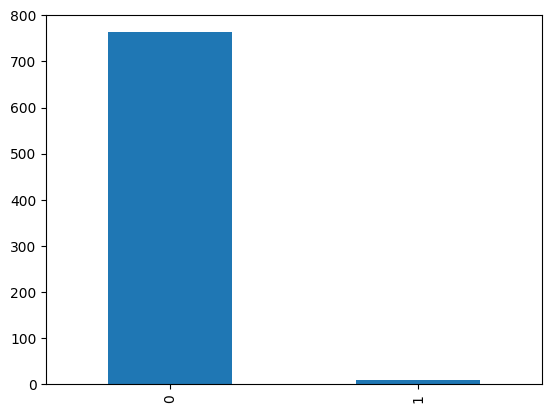

In [72]:
df['Class'].value_counts().plot.bar()

In [73]:
df['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

## Imbalanced data handling

In [74]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [77]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 763, 1: 9})
Resample dataset shape Counter({0: 763, 1: 763})


In [88]:
df_balanced = pd.DataFrame(x_smote)
df_balanced['Class'] = y_smote

## Sampling Methods

## Sampling Methods

### Simple Random Sampling

In [ ]:
Z = 1.96
p = 0.5
E = 0.05

sample_size = int(np.ceil((Z**2 * p * (1 - p))/(E**2)))
print('Sample size:', sample_size)

Sample size: 385


In [ ]:
random_sample = df_balanced.sample(n=sample_size, random_state=17)
random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
921,176,-0.045464,0.620890,0.349085,0.308581,0.755873,0.167808,0.155020,0.201934,-0.255041,...,-0.096547,-0.364636,0.120285,-1.279989,-1.317595,0.080520,0.233215,0.211550,0.940635,1
971,488,1.009766,0.403745,0.337276,0.570103,-0.110568,-0.791316,0.136576,-0.137060,-0.014336,...,-0.253754,-0.728797,0.132552,-0.014305,-0.116024,0.090417,0.030981,0.072658,1.227186,1
1052,68,1.228667,0.315266,0.245875,0.591151,-0.191865,-0.659048,0.017857,-0.082983,-0.085798,...,-0.261861,-0.751926,0.116930,0.056682,0.195642,0.107687,-0.017372,0.024162,2.690000,1
1176,403,-2.288634,1.940641,-1.597891,3.974005,-0.518268,-1.417495,-2.520834,1.382860,-2.753158,...,0.512230,-0.039114,-0.461397,0.315754,0.045345,0.177490,0.259326,-0.142212,0.018112,1
210,140,-4.636534,-5.931717,-0.227301,-2.737271,7.672544,-0.996355,-3.391184,1.236267,1.129462,...,0.655844,-0.047158,0.869558,1.020755,0.706125,-0.207096,-0.167680,0.217685,65.000000,0


In [ ]:
x = random_sample.iloc[:, :-1]
y = random_sample.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [ ]:
scale_X = StandardScaler()
x_train = scale_X.fit_transform(x_train)
x_test = scale_X.transform(x_test)

In [ ]:
S1 = {}

#### Logistic regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred = log_reg.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M1'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M1'])

[[38  4]
 [ 4 31]]
Accuracy: 0.8961038961038961


#### Naive Bayes

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
pred = nb_classifier.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M2'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M2'])

[[34  8]
 [ 4 31]]
Accuracy: 0.8441558441558441


#### SVM

In [ ]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M3'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M3'])

[[37  5]
 [ 0 35]]
Accuracy: 0.935064935064935


#### Decision tree

In [ ]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 17)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=17)

In [ ]:
pred = dt.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M4'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M4'])

[[39  3]
 [ 2 33]]
Accuracy: 0.935064935064935


#### Random forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=17)

In [ ]:
pred = rf.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M5'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M5'])

[[42  0]
 [ 0 35]]
Accuracy: 1.0


### Systematic Sampling

In [109]:
random_sample = df_balanced.sample(n=sample_size, random_state=17)
random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
921,176,-0.045464,0.620890,0.349085,0.308581,0.755873,0.167808,0.155020,0.201934,-0.255041,...,-0.096547,-0.364636,0.120285,-1.279989,-1.317595,0.080520,0.233215,0.211550,0.940635,1
971,488,1.009766,0.403745,0.337276,0.570103,-0.110568,-0.791316,0.136576,-0.137060,-0.014336,...,-0.253754,-0.728797,0.132552,-0.014305,-0.116024,0.090417,0.030981,0.072658,1.227186,1
1052,68,1.228667,0.315266,0.245875,0.591151,-0.191865,-0.659048,0.017857,-0.082983,-0.085798,...,-0.261861,-0.751926,0.116930,0.056682,0.195642,0.107687,-0.017372,0.024162,2.690000,1
1176,403,-2.288634,1.940641,-1.597891,3.974005,-0.518268,-1.417495,-2.520834,1.382860,-2.753158,...,0.512230,-0.039114,-0.461397,0.315754,0.045345,0.177490,0.259326,-0.142212,0.018112,1
210,140,-4.636534,-5.931717,-0.227301,-2.737271,7.672544,-0.996355,-3.391184,1.236267,1.129462,...,0.655844,-0.047158,0.869558,1.020755,0.706125,-0.207096,-0.167680,0.217685,65.000000,0


In [110]:
x = random_sample.iloc[:, :-1]
y = random_sample.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [114]:
scale_X = StandardScaler()
x_train = scale_X.fit_transform(x_train)
x_test = scale_X.transform(x_test)

In [150]:
S2 = {}

#### Logistic regression

In [151]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [152]:
pred = log_reg.predict(x_test)
print(confusion_matrix(y_test, pred))

S2['M1'] = accuracy_score(y_test, pred)
print('Accuracy:', S2['M1'])

[[38  4]
 [ 4 31]]
Accuracy: 0.8961038961038961


#### Naive Bayes

In [153]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [154]:
pred = nb_classifier.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M2'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M2'])

[[34  8]
 [ 4 31]]
Accuracy: 0.8441558441558441


#### SVM

In [157]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [158]:
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M3'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M3'])

[[37  5]
 [ 0 35]]
Accuracy: 0.935064935064935


#### Decision tree

In [160]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 17)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=17)

In [161]:
pred = dt.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M4'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M4'])

[[39  3]
 [ 2 33]]
Accuracy: 0.935064935064935


#### Random forest

In [162]:
rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=17)

In [163]:
pred = rf.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M5'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M5'])

[[42  0]
 [ 0 35]]
Accuracy: 1.0
